# Импортируем библиотеки `"pandas"` (библиотека для обработки и анализа данных), `"matmlotlib"` (низкоуровневая библиотека для построения графиков на `Python`, которая служит в качестве утилиты визуализации), а именно модуль `.pyplot` (модуль в пакете Matplotlib) и и `Seaborn` — это программный пакет визуализации данных для языка программирования Python, основанный на библиотеке Matplotlib.
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка csv-файла в объект DataFrame.
# Метод pd.read_csv() считывает данные из файла csv (формата .csv) и загружает в таблицу.
df_walmart = pd.read_csv('cleaned_walmart_sales.csv')

In [3]:
# Убираем научную (scientific) нотацию в выводе чисел в pandas глобально
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Удалить лишние пробелы в названиях столбцов.
df_walmart.columns = df_walmart.columns.str.strip()

# Вывести названия столбцов DataFrame.
print("Названия столбцов DataFrame:")
df_walmart.columns

Названия столбцов DataFrame:


Index(['id', 'store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [5]:
# Отображаем первые 5 строк датафрейма
df_walmart.head()

,id,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11
1,2,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11
2,3,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,4,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,5,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11


In [6]:
# Отображаем последние 5 строк датафрейма
df_walmart.tail()

,id,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
6430,6431,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68
6431,6432,45,2012-10-05,733455.07,0,64.89,3.98,192.17,8.67
6432,6433,45,2012-10-12,734464.36,0,54.47,4.00,192.33,8.67
6433,6434,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67
6434,6435,45,2012-10-26,760281.43,0,58.85,3.88,192.31,8.67


In [7]:
# Функция .info() показывает информацию о DataFrame
# Включая типы данных и использование памяти
# memory_usage = "deep" позволяет получить более точную информацию о потреблении памяти
# Важно отметить, что использование memory_usage = "deep" может занять больше времени, так как оно требует дополнительного анализа
df_walmart.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6435 non-null   int64  
 1   store         6435 non-null   int64  
 2   date          6435 non-null   object 
 3   weekly_sales  6435 non-null   float64
 4   holiday_flag  6435 non-null   int64  
 5   temperature   6435 non-null   float64
 6   fuel_price    6435 non-null   float64
 7   cpi           6435 non-null   float64
 8   unemployment  6435 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 773.1 KB


In [8]:
# Просматриваем соразмерность столбца (строки и столбцы / читать слева на право)
df_walmart.shape

(6435, 9)

In [9]:
# Метод .describe() используется для получения сводной статистики по DataFrame.
# Он автоматически рассчитывает количество ненулевых значений (count), среднее значение (mean),
# стандартное отклонение (std / разброс данных), минимальное значение (min), 25-й, 50-й (медиана) и 75-й процентили (quartiles), а также максимальное значение (max)
# для каждого числового столбца в DataFrame df_walmart.
df_walmart.describe()

,id,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,3218.00,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,1857.77,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,1609.50,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,3218.00,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,4826.50,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,6435.00,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


Перевести колонку `Date` с типом данных object на формат `"datetime"`.
---
### Результат анализа колоноки с типом данных "время" по фактическому содержимому:
| Название колонки | Ожидаемый результат |
| ----------- | ----------- |
| `Date` | ✅ Содержит дату. Преобразовать к `datetime`. |

In [10]:
# Преобразование столбца 'date' в формат datetime
df_walmart['date'] = pd.to_datetime(
    df_walmart['date'],
    errors='coerce',      # если значение не удаётся преобразовать, то → NaT
    dayfirst=False        # Указываем dayfirst=False, чтобы Pandas правильно понял день и месяц
)

print(df_walmart['date'].dtype)

datetime64[ns]


---

## Проведите исследовательский анализ данных 
### Определите, как меняется объем продаж в зависимости от праздников и времени года.
### 1.	Постройте визуализацию, демонстрирующую динамику понедельных продаж по сети за год.
### 2.	Ответьте на вопрос: какие сезоны или недели имеют наибольшие объемы продаж?
---

### Создание нового признака `season` (времена года)
### Для анализа сезонности вводим категориальный признак на основе месяца
### Функция `get_season()` присваивает каждому месяцу соответствующий сезон:
### Winter (декабрь–февраль), Spring (март–май), Summer (июнь–август), Autumn (сентябрь–ноябрь)
### Признак используется для группировки продаж и выявления сезонных закономерностей
---

In [11]:
# Функция для получения сезона по месяцу
# Параметр month должен быть целым числом от 1 до 12
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
# Применяем функцию get_season к столбцу 'date' и создаём новый столбец 'season'
df_walmart['season'] = df_walmart['date'].dt.month.apply(get_season)

# Проверяем, что новый столбец 'season' был успешно добавлен (общее распределение данных по сезонам)
df_walmart['season'].value_counts()

season
Summer    1800
Spring    1755
Autumn    1530
Winter    1350
Name: count, dtype: int64

### Визуализация общей выручки по сезонам
### Группируем продажи по признаку `season` и вычисляем суммарные продажи за каждый сезон
### Столбчатая диаграмма позволяет сравнить общий вклад каждого сезона в общую выручку сети Walmart
### Это помогает определить, в какие сезоны бизнес получает наибольшую прибыль в совокупности
---

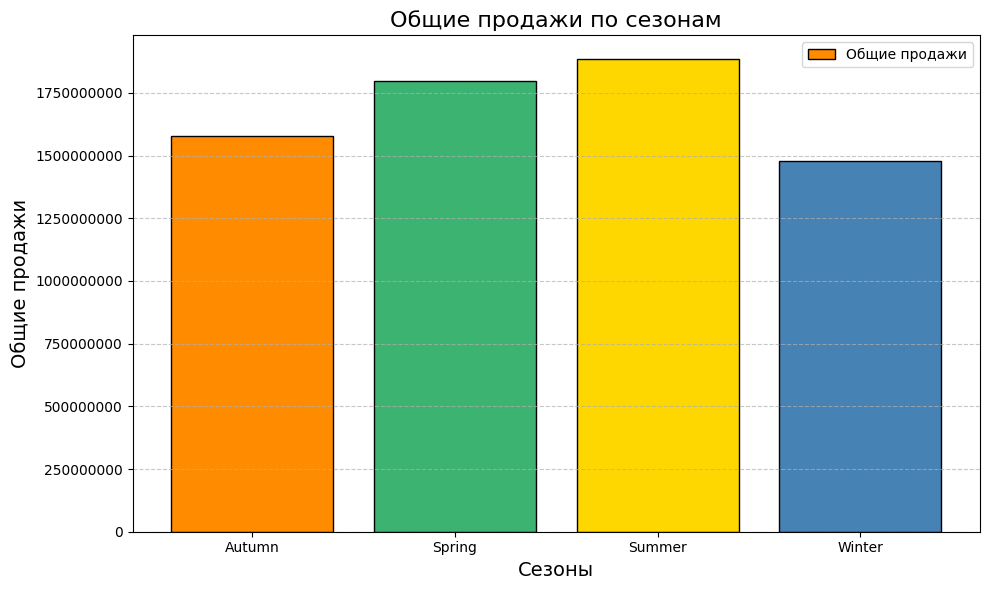

In [12]:
# Вычисляем общие продажи по сезонам
total_sales_by_season = (
    df_walmart.groupby('season')['weekly_sales']
    .sum()
    .reset_index()
    .rename(columns={'weekly_sales': 'total_sales'})
)

# Построение графика общих продаж по сезонам
plt.figure(figsize=(10, 6))

# Создание столбчатой диаграммы
plt.bar(
    total_sales_by_season['season'],
    total_sales_by_season['total_sales'],
    color=['#FF8C00', '#3CB371', '#FFD700', '#4682B4'],
    edgecolor='black',  # Добавляем черную окантовку для лучшей видимости
)

# Настройка внешнего вида графика
plt.title('Общие продажи по сезонам', fontsize=16)
plt.xlabel('Сезоны', fontsize=14)
plt.ylabel('Общие продажи', fontsize=14)
plt.legend(['Общие продажи'])
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y') # убираем научную нотацию на оси Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку по оси Y
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

### Анализ средней недельной выручки по сезонам
### Группируем данные по признаку `season` и вычисляем среднее значение продаж за неделю
### Столбчатая диаграмма позволяет сравнить интенсивность продаж в разных сезонах
### Это помогает выявить, когда продажи наиболее активны по средней нагрузке на неделю
---

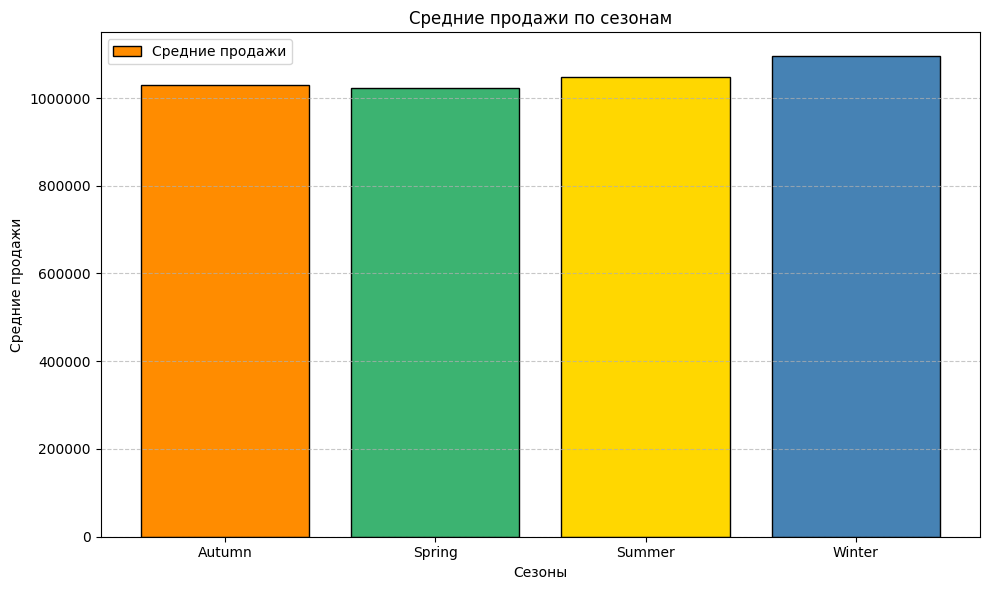

In [13]:
# Вычисляем средние продажи по сезонам
avg_sales_by_season = (
    df_walmart.groupby('season')['weekly_sales']
    .mean()
    .reset_index()
    .rename(columns={'weekly_sales': 'avg_sales'})
)

# Построение графика средних продаж по сезонам
plt.figure(figsize=(10, 6))

# Создание столбчатой диаграммы
plt.bar(
    avg_sales_by_season['season'],
    avg_sales_by_season['avg_sales'],
    color=['#FF8C00', '#3CB371', '#FFD700', '#4682B4'],
    edgecolor='black'  # Добавляем черную окантовку для лучшей видимости
)

# Настройка внешнего вида графика
plt.title('Средние продажи по сезонам')
plt.xlabel('Сезоны')
plt.ylabel('Средние продажи')
plt.legend(['Средние продажи'])
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y') # убираем научную нотацию на оси Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку по оси Y
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

### Анализ влияния праздничных недель на среднюю выручку
### Группируем данные по признаку `holiday_flag` (1 — праздничная неделя, 0 — обычная)
### Вычисляем среднее значение `weekly_sales` для каждой группы
### Столбчатая диаграмма показывает разницу в средней выручке между праздничными и обычными неделями
---

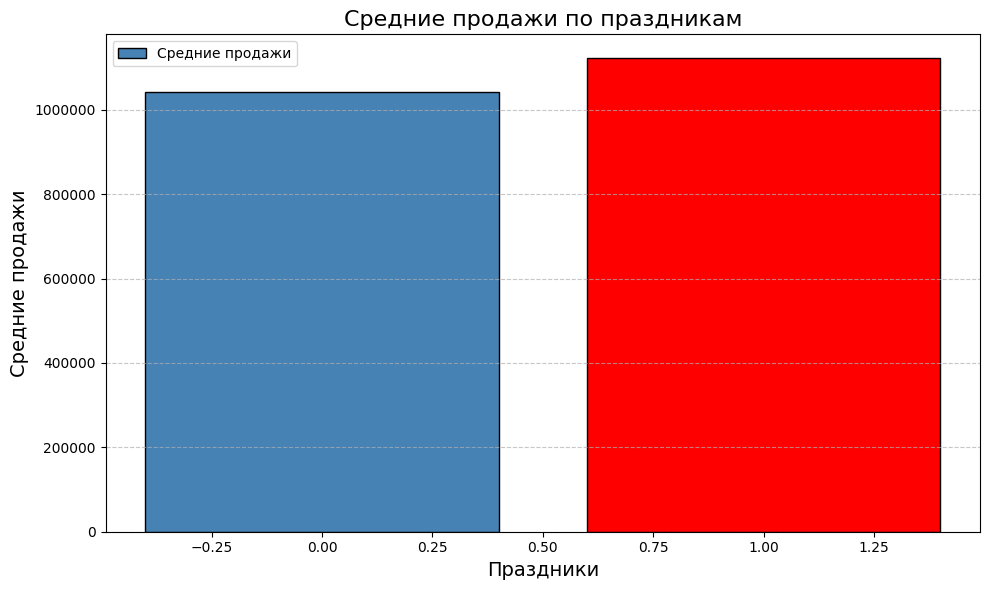

In [14]:
# Вычисляем средние продажи по пораздникам
avg_sales_by_holiday = (
    df_walmart.groupby('holiday_flag')['weekly_sales']
    .mean()
    .reset_index()
    .rename(columns={'weekly_sales': 'avg_sales_holiday'})
)

# Построение графика средних продаж по сезонам
plt.figure(figsize=(10, 6))

# Создание столбчатой диаграммы
plt.bar(
    avg_sales_by_holiday['holiday_flag'],
    avg_sales_by_holiday['avg_sales_holiday'],
    color=['#4682B4', 'red'],
    edgecolor='black'  # Добавляем черную окантовку для лучшей видимости
)

# Настройка внешнего вида графика
plt.title('Средние продажи по праздникам', fontsize=16)
plt.xlabel('Праздники', fontsize=14)
plt.ylabel('Средние продажи', fontsize=14)
plt.legend(['Средние продажи'])
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y') # убираем научную нотацию на оси Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку по оси Y
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

### Построение линейного графика понедельных продаж по дате
### Группируем продажи по каждой дате (неделе) и отображаем динамику во времени
### График помогает визуально определить тренды, пики и спады спроса с 2010 по 2012 год
---

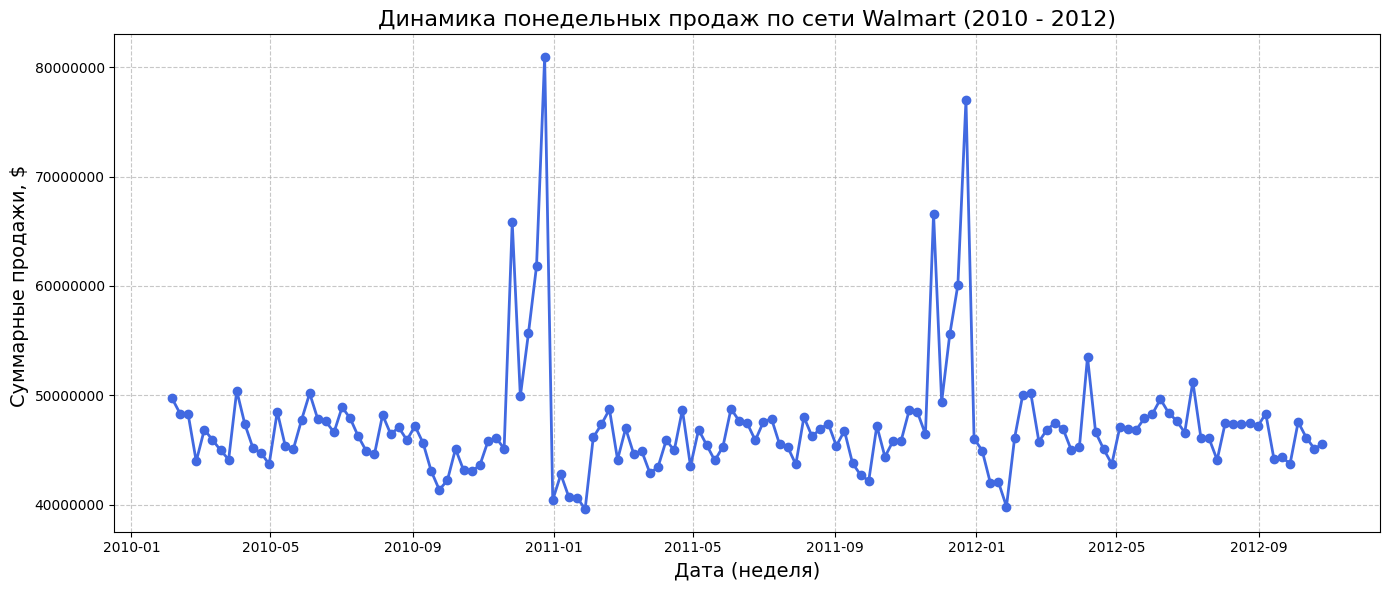

In [15]:
# Группируем данные по дате (неделя) и суммируем продажи по всей сети
weekly_sales_by_date = (
    df_walmart.groupby('date')['weekly_sales']
    .sum()
    .reset_index()
    .sort_values(by='date', ascending=True) 
)

# Построение линейного графика еженедельных продаж
plt.figure(figsize=(14, 6))

# Создание линейного графика
plt.plot(
    weekly_sales_by_date['date'],
    weekly_sales_by_date['weekly_sales'],
    color='royalblue',
    marker='o',
    linewidth=2
)

# Настройка внешнего вида графика
plt.title('Динамика понедельных продаж по сети Walmart (2010 - 2012)', fontsize=16)
plt.xlabel('Дата (неделя)', fontsize=14)
plt.ylabel('Суммарные продажи, $ ', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7) # Добавление сетки
plt.ticklabel_format(style='plain', axis='y') # убираем научную нотацию на оси Y
plt.tight_layout() # Автоматическая настройка отступов
plt.show()

---
### Извлекаем номер недели из даты и считаем средние продажи по неделям года
### Это позволит определить, какие недели приносят наибольшую выручку вне зависимости от года
---

In [16]:
# Добавляем столбец "week" с номером недели в году
# Используем метод isocalendar() для получения номера недели в году
df_walmart['week'] = df_walmart['date'].dt.isocalendar().week

---
### Строим линейный график средних продаж по неделям календарного года `(1–52)`
### Визуализация позволяет выявить пики и провалы спроса по неделям
---

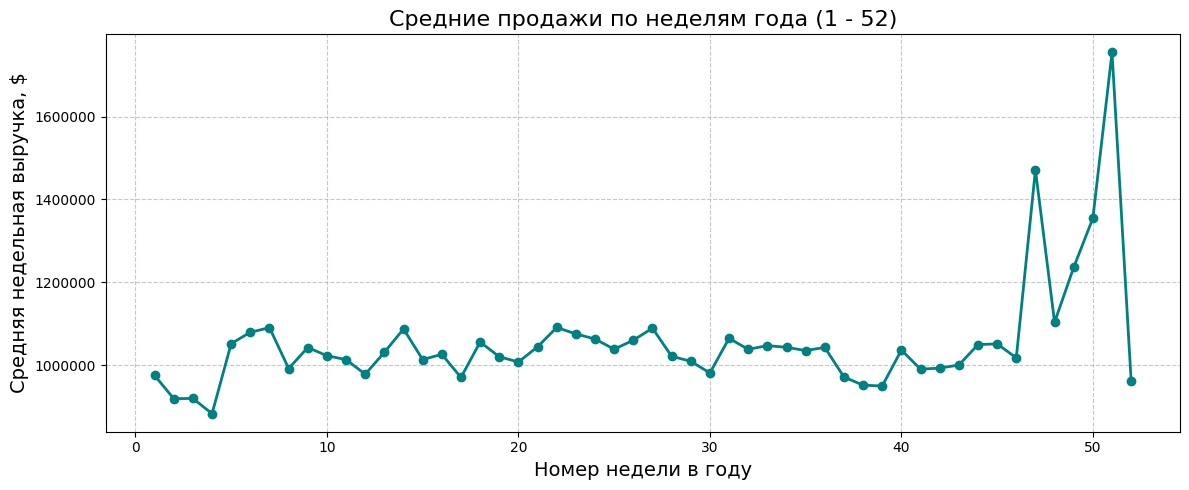

In [17]:
# Группируем данные по неделям и вычисляем средние продажи
avg_sales_by_week = (
    df_walmart.groupby('week')['weekly_sales']
    .mean()
    .reset_index()
    .rename(columns={'weekly_sales': 'avg_weekly_sales'})
)

# Построение линейного графика средних продаж по неделям
plt.figure(figsize=(12, 5))

# Создание линейного графика
plt.plot(
    avg_sales_by_week['week'],
    avg_sales_by_week['avg_weekly_sales'],
    color='teal',
    marker='o',
    linewidth=2
)

# Настройка внешнего вида графика
plt.title('Средние продажи по неделям года (1 - 52)', fontsize=16)
plt.xlabel('Номер недели в году', fontsize=14)
plt.ylabel('Средняя недельная выручка, $', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7) # Добавление сетки
plt.ticklabel_format(style='plain', axis='y') # убираем научную нотацию на оси Y
plt.tight_layout() # Автоматическая настройка отступов
plt.show()

### Выводим топ-5 недель года с наибольшей средней выручкой
### Эти недели являются стратегически важными для бизнеса
---

In [18]:
top_weeks = (
    avg_sales_by_week
    .sort_values(by='avg_weekly_sales', ascending=False)
    .head(5)
)

top_weeks

,week,avg_weekly_sales
50,51,1754773.97
46,47,1471273.43
49,50,1354516.62
48,49,1235865.76
47,48,1103328.72


---
### Исследуйте влияние макроэкономических факторов `(CPI, Unemployment)` на продажи.
## 1.	Постройте график для анализа связи между данными о продажах и этими показателями.
## 2.	Ответьте на вопрос: какие факторы влияют на продажи сильнее?
---

### Построение графика рассеяния влияния между `CPI` и средними продажами по неделям `(продажами)`
---

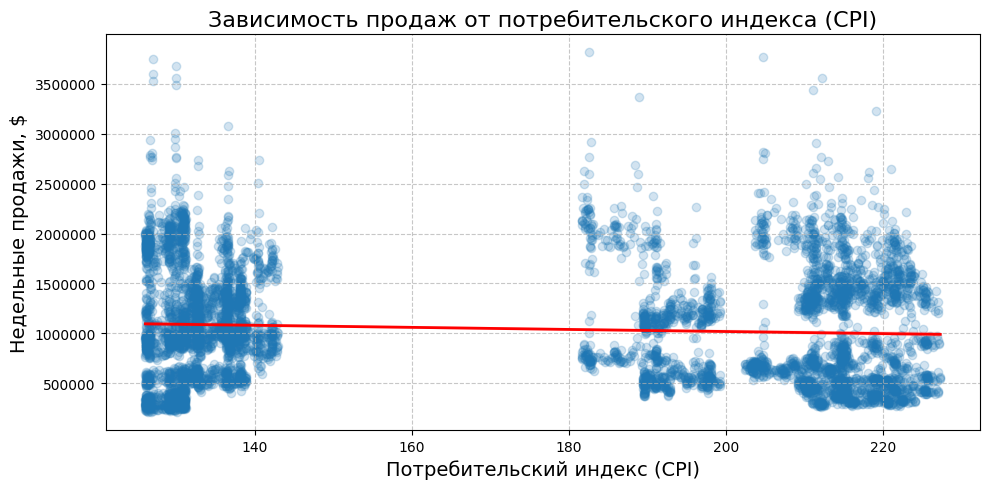

In [19]:
# Построение графика рассеяния влияния между CPI и средними продажами по неделям (продажами)
plt.figure(figsize=(10, 5))

# Создание графика рассеяния и линии тренда (regression line)
sns.regplot(
    data=df_walmart,
    x='cpi',
    y='weekly_sales',
    scatter_kws={'alpha': 0.2}, # Настройка внешнего вида точек
    line_kws={'color': 'red', 'linewidth': 2} # Настройка внешнего вида линии тренда
)

# Настройка внешнего вида графика
plt.title('Зависимость продаж от потребительского индекса (CPI)', fontsize=16)
plt.xlabel('Потребительский индекс (CPI)', fontsize=14)
plt.ylabel ('Недельные продажи, $', fontsize=14)
plt.ticklabel_format(style='plain', axis='y') # убираем научную нотацию на оси Y
plt.grid(True, linestyle='--', alpha=0.7) # Добавление сетки
plt.tight_layout() # Автоматическая настройка отступов
plt.show()

### Построение графика рассеяния влияния между `Unemployment` и средними продажами по неделям `(продажами)`
---

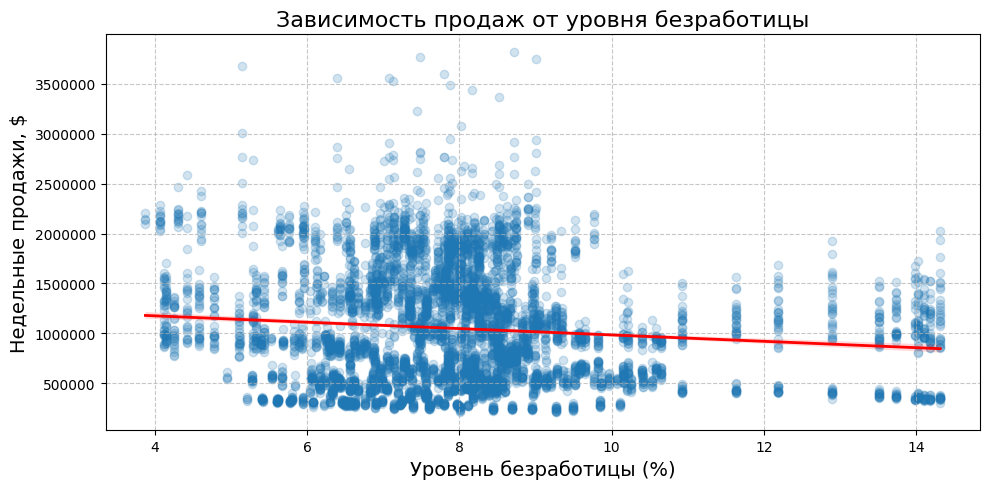

In [20]:
# Построение графика рассеяния влияния между Unemployment и средними продажами по неделям (продажами)
plt.figure(figsize=(10, 5))

# Создание графика рассеяния и линии тренда (regression line)
sns.regplot(
    data=df_walmart,
    x='unemployment',
    y='weekly_sales',
    scatter_kws={'alpha': 0.2}, # Настройка внешнего вида точек
    line_kws={'color': 'red', 'linewidth': 2} # Настройка внешнего вида линии тренда
)

# Настройка внешнего вида графика
plt.title('Зависимость продаж от уровня безработицы', fontsize=16)
plt.xlabel('Уровень безработицы (%)', fontsize=14)
plt.ylabel('Недельные продажи, $', fontsize=14)
plt.ticklabel_format(style='plain', axis='y') # убераем научную нотацию на оси Y
plt.grid(True, linestyle='--', alpha=0.7) # добавляем сетку
plt.tight_layout() # Автоматическая настройка отступов
plt.show()

### Вычислим коэффициенты корреляций Пирсона `(Pearson correlation coefficient)`.
---

In [21]:
# Метод .corr() вычисляет коэффициент корреляции между двумя столбцами DataFrame
# Корреляция показывает, насколько сильно связаны два признака 
# (в данном случае CPI и weekly_sales, Unemployment и weekly_sales)

# Вычисляем корреляцию между CPI и средними продажами
corr_cpi = df_walmart['cpi'].corr(df_walmart['weekly_sales'])

# Вычисляем корреляцию между уровнем безработицы и средними продажами
corr_unemployment = df_walmart['unemployment'].corr(df_walmart['weekly_sales'])

# {corr_cpi:.2f} - форматирует число с двумя знаками после запятой. Аналогично для corr_unemployment
# Выводим результаты корреляций
print(f'Коэффициент корреляции между CPI и средними продажами: {corr_cpi:.2f}')
print(f'Коэффициент кореляции между уровнем безработицы и средними продажами: {corr_unemployment:.2f}')

Коэффициент корреляции между CPI и средними продажами: -0.07
Коэффициент кореляции между уровнем безработицы и средними продажами: -0.11


---
## Оцените зависимость продаж от `погодных условий` и изменения цен на `топливо` в регионе.
### 1. Создайте визуализацию, отражающую эту зависимость.
### 2. Ответьте на вопрос: как изменения погодных условий и стоимости топлива могут повлиять на продажи?
### 3. На основе анализа предложите рекомендации: как компании следует адаптировать стратегию продаж, учитывая внешние условия?
---

### Построение графика рассеяния влияния между температурой и продажами по неделям (продажами)
---

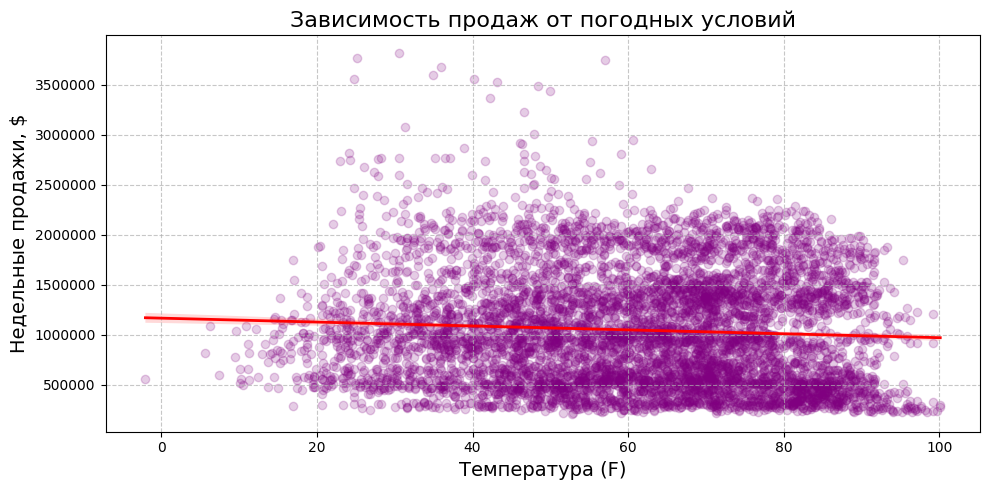

In [22]:
# Построение графика рассеяния влияния между температурой и продажами по неделям (продажами)
plt.figure(figsize=(10, 5))

# Создание графика рассеяния и линии тренда (regression line)
sns.regplot(
    data=df_walmart,
    x='temperature',
    y='weekly_sales',
    scatter_kws={'alpha': 0.2, 'color': 'purple'}, # Настройка внешнего вида точек
    line_kws={'color': 'red', 'linewidth': 2} # Настройка внешнего вида линии тренда
)

# Настройка внешнего вида графика
plt.title('Зависимость продаж от погодных условий', fontsize=16)
plt.xlabel('Температура (F)', fontsize=14)
plt.ylabel('Недельные продажи, $', fontsize=14)
plt.ticklabel_format(style='plain', axis='y') # убераем научную нотацию на оси Y
plt.grid(True, linestyle='--', alpha=0.7) # добавляем сетку
plt.tight_layout() # Автоматическая настройка отступов
plt.show()

### Построение графика рассеяния влияния между ценой топлива и продажами по неделям (продажами)
---

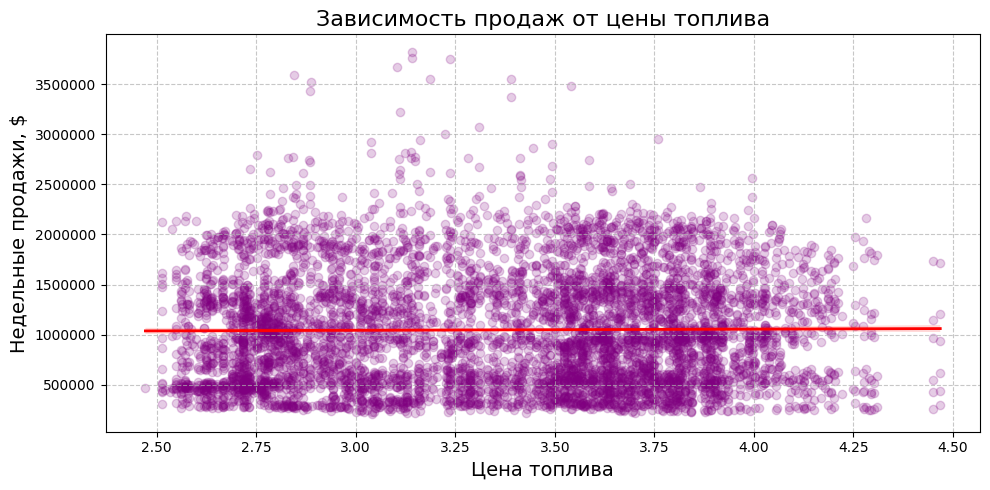

In [23]:
# Построение графика рассеяния влияния между ценой топлива и продажами по неделям (продажами)
plt.figure(figsize=(10, 5))

# Создание графика рассеяния и линии тренда (regression line)
sns.regplot(
    data=df_walmart,
    x='fuel_price',
    y='weekly_sales',
    scatter_kws={'alpha': 0.2, 'color': 'purple'}, # Настройка внешнего вида точек
    line_kws={'color': 'red', 'linewidth': 2} # Настройка внешнего вида линии тренда
)

# Настройка внешнего вида графика
plt.title('Зависимость продаж от цены топлива', fontsize=16)
plt.xlabel('Цена топлива', fontsize=14)
plt.ylabel('Недельные продажи, $', fontsize=14)
plt.ticklabel_format(style='plain', axis='y') # убераем научную нотацию на оси Y
plt.grid(True, linestyle='--', alpha=0.7) # добавляем сетку
plt.tight_layout() # Автоматическая настройка отступов
plt.show()

### Вычислим коэффициенты корреляций Пирсона `(Pearson correlation coefficient)`.
---

In [24]:
# Метод .corr() вычисляет коэффициент корреляции между двумя столбцами DataFrame
# Корреляция показывает, насколько сильно связаны два признака 
# (в данном случае temperature и weekly_sales, fuel_price и weekly_sales)

# Вычисляем корреляцию между температурой и средними продажами
corr_temperature = df_walmart['temperature'].corr(df_walmart['weekly_sales'])

# Вычисляем корреляцию между ценой топлива и продажами
corr_fuel_price = df_walmart['fuel_price'].corr(df_walmart['weekly_sales'])

# {corr_temperature:.2f} - форматирует число с двумя знаками после запятой. Аналогично для corr_fuel_price
# Выводим результаты корреляций
print(f'Коэффициент корреляции между temperature и продажами: {corr_temperature:.2f}')
print(f'Коэффициент корреляции между fuel_price и продажами: {corr_fuel_price:.2f}')

Коэффициент корреляции между temperature и продажами: -0.06
Коэффициент корреляции между fuel_price и продажами: 0.01
